In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_details.csv')
df.head(5)

,brand,price,type,colour,msoffice,RAM,RAMtype,SSD,SSDCap,HDDCap,...,GPUramcap,OS,Touchscreen,Screensize,Screenreso,refreshrate,Bluetooth,Weight,BacklitKB,warranty
0,MSI,"₹45,990",Gaming Laptop,Black,No,8 GB,DDR5,Yes,512 GB,0,...,4 GB,Windows 11 Home,No,39.62 cm (15.6 inch),1920 X 1080 Pixel,144 Hz,v5.3,2.35 Kg,Yes,1 Year Carry-in Warranty
1,AXL,"₹16,970",Thin and Light Laptop,Space Grey,No,4 GB,DDR4,Yes,256 GB,0,...,2 GB,Windows 11 Home,No,39.62 cm (15.6 inch),1920*1080 pixel,60,yes,NaN,No,1 Year
2,HP,"₹36,990",Thin and Light Laptop,Natural Silver,Yes,8 GB,DDR4,Yes,512 GB,0,...,2 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),1920 x 1080 Pixels,60,v5.0,1.69 kg,Yes,1 Year Onsite Warranty
3,Acer,"₹29,990",Thin and Light Laptop,Steel Gray,No,8 GB,LPDDR5,Yes,512 GB,0,...,2 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),1920 x 1080 Pixel,60,v5.1,1.78 Kg,No,1 Year International Travelers Warranty
4,HP,"₹32,990",Thin and Light Laptop,Natural Silver,Yes,8 GB,DDR4,Yes,512 GB,0,...,2 GB,Windows 11 Home,No,39.62 cm (15.6 inch),1920 x 1080 Pixel,60,v4.2,1.69 Kg,No,1 Year Onsite Warranty


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             959 non-null    object
 1   price             959 non-null    object
 2   type              959 non-null    object
 3   colour            959 non-null    object
 4   msoffice          959 non-null    object
 5   RAM               959 non-null    object
 6   RAMtype           959 non-null    object
 7   SSD               959 non-null    object
 8   SSDCap            959 non-null    object
 9   HDDCap            959 non-null    object
 10  ProcessorBrand    959 non-null    object
 11  ProcessorName     959 non-null    object
 12  ProcessorVariant  852 non-null    object
 13  ClockSpeed        832 non-null    object
 14  GPU               935 non-null    object
 15  GPUramtype        959 non-null    object
 16  GPUramcap         959 non-null    object
 17  OS              

In [4]:
columns = df.columns.tolist()
columns.remove('price')
columns.append('price')
df = df[columns]

In [5]:
df.duplicated().sum()

140

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 958
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             819 non-null    object
 1   type              819 non-null    object
 2   colour            819 non-null    object
 3   msoffice          819 non-null    object
 4   RAM               819 non-null    object
 5   RAMtype           819 non-null    object
 6   SSD               819 non-null    object
 7   SSDCap            819 non-null    object
 8   HDDCap            819 non-null    object
 9   ProcessorBrand    819 non-null    object
 10  ProcessorName     819 non-null    object
 11  ProcessorVariant  733 non-null    object
 12  ClockSpeed        714 non-null    object
 13  GPU               795 non-null    object
 14  GPUramtype        819 non-null    object
 15  GPUramcap         819 non-null    object
 16  OS                819 non-null    object
 17  Touchscreen       819

In [7]:
df.isnull().sum()

brand                 0
type                  0
colour                0
msoffice              0
RAM                   0
RAMtype               0
SSD                   0
SSDCap                0
HDDCap                0
ProcessorBrand        0
ProcessorName         0
ProcessorVariant     86
ClockSpeed          105
GPU                  24
GPUramtype            0
GPUramcap             0
OS                    0
Touchscreen           0
Screensize            0
Screenreso            0
refreshrate           0
Bluetooth             0
Weight               85
BacklitKB            51
warranty              0
price                 0
dtype: int64

In [8]:
df['price'] = df['price'].str.replace('₹', '')  
df['price'] = df['price'].str.replace(',', '')  
df['price'] = pd.to_numeric(df['price'])  
df['price']      

0      45990
1      16970
2      36990
3      29990
4      32990
       ...  
954    61990
955    87190
956    37790
957    85999
958    90900
Name: price, Length: 819, dtype: int64

### Analysing 'RAM' Column

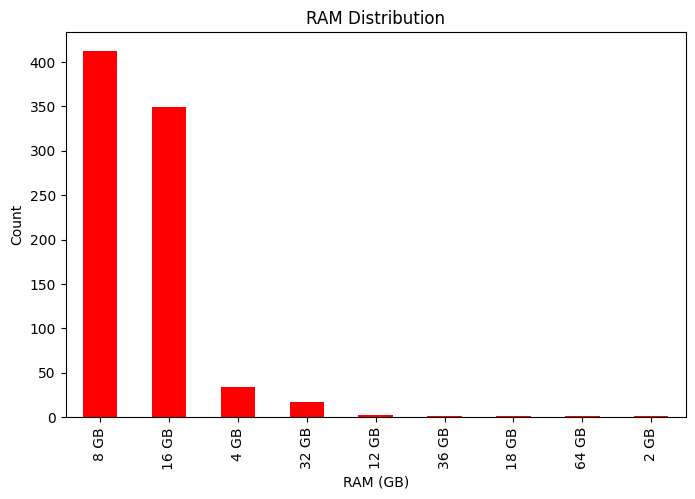

In [9]:
plt.figure(figsize=(8, 5))
df['RAM'].value_counts().plot(kind='bar', color='red')
plt.title('RAM Distribution')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

In [10]:
df['RAM'].isnull().sum()

0

In [11]:
df['RAM'].unique()

array(['8 GB', '4 GB', '12 GB', '16 GB', '32 GB', '36 GB', '18 GB',
       '64 GB', '2 GB'], dtype=object)

In [12]:
df['RAM'] = df['RAM'].apply(lambda x: int(x.split()[0]))
df['RAM']

0       8
1       4
2       8
3       8
4       8
       ..
954     8
955    16
956     8
957    16
958    16
Name: RAM, Length: 819, dtype: int64

In [13]:
corr = df['RAM'].corr(df['price'])
print(corr)

0.7008516895437344


In [14]:
df.head(5)

,brand,type,colour,msoffice,RAM,RAMtype,SSD,SSDCap,HDDCap,ProcessorBrand,...,OS,Touchscreen,Screensize,Screenreso,refreshrate,Bluetooth,Weight,BacklitKB,warranty,price
0,MSI,Gaming Laptop,Black,No,8,DDR5,Yes,512 GB,0,AMD,...,Windows 11 Home,No,39.62 cm (15.6 inch),1920 X 1080 Pixel,144 Hz,v5.3,2.35 Kg,Yes,1 Year Carry-in Warranty,45990
1,AXL,Thin and Light Laptop,Space Grey,No,4,DDR4,Yes,256 GB,0,Intel,...,Windows 11 Home,No,39.62 cm (15.6 inch),1920*1080 pixel,60,yes,NaN,No,1 Year,16970
2,HP,Thin and Light Laptop,Natural Silver,Yes,8,DDR4,Yes,512 GB,0,Intel,...,Windows 11 Home,No,39.62 cm (15.6 Inch),1920 x 1080 Pixels,60,v5.0,1.69 kg,Yes,1 Year Onsite Warranty,36990
3,Acer,Thin and Light Laptop,Steel Gray,No,8,LPDDR5,Yes,512 GB,0,AMD,...,Windows 11 Home,No,39.62 cm (15.6 Inch),1920 x 1080 Pixel,60,v5.1,1.78 Kg,No,1 Year International Travelers Warranty,29990
4,HP,Thin and Light Laptop,Natural Silver,Yes,8,DDR4,Yes,512 GB,0,AMD,...,Windows 11 Home,No,39.62 cm (15.6 inch),1920 x 1080 Pixel,60,v4.2,1.69 Kg,No,1 Year Onsite Warranty,32990


### Analysing RAMtype column

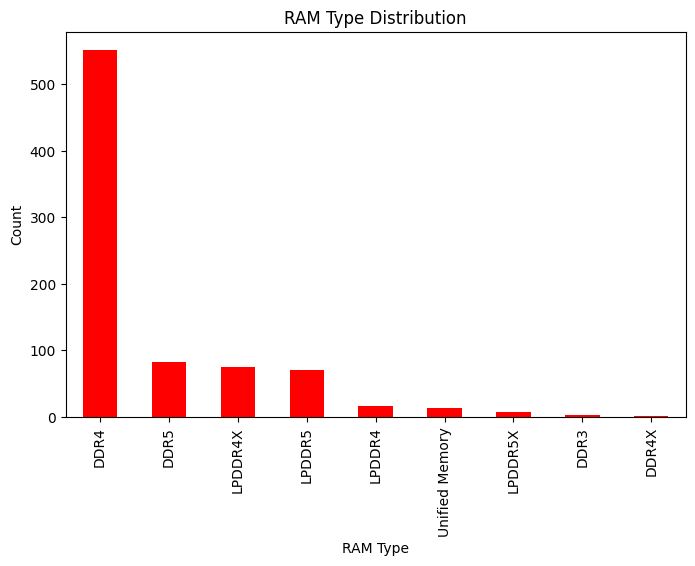

In [16]:
plt.figure(figsize=(8, 5))
df['RAMtype'].value_counts().plot(kind='bar', color='red')
plt.title('RAM Type Distribution')
plt.xlabel('RAM Type')
plt.ylabel('Count')
plt.show()

In [21]:
df['GPU'].unique()

array(['AMD Radeon RX6550M', 'Intel Integrated', 'Intel Integrated UHD',
       'AMD Radeon AMD', 'AMD Radeon Vega 8 Graphics',
       'Intel Integrated Intel UHD Graphics',
       'Intel Integrated UHD Graphics', 'AMD Radeon 610M Graphics',
       'Intel Integrated Iris Xe', 'AMD Radeon AMD Radeon™ Graphics',
       'NVIDIA GeForce RTX 3050', 'NVIDIA GeForce GTX 1650',
       'Intel Integrated Integrated', 'NVIDIA GeForce RTX 2050',
       'Intel Integrated Iris Xe Graphics', 'AMD Radeon Radeon Graphics',
       nan, 'AMD Radeon 610M', 'AMD Radeon RX 6500M',
       'MediaTek Integrated ARM Mali-G52 2EE MC2', 'NA Radeon Graphics',
       'Intel Integrated Iris Plus', 'NVIDIA GeForce RTX 4050',
       'Intel Integrated Intel Iris Xe Graphics',
       'AMD Radeon AMD Radeon™ Vega 7 Graphics',
       'AMD Radeon AMD Radeon 610M Graphics', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce MX550', 'Intel Integrated 96EU Iris Xe',
       'NVIDIA GeForce MX450', 'NVIDIA GeForce GTX 1650 Max Q